In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
infile = "../../Downloads/kegg_genes.mappings.csv"

In [12]:
genes_df = pd.read_csv(infile).set_index("KEGG_ID")

In [22]:
genes_df_500000 = genes_df.sample(500000).reset_index()

In [75]:
tmp_genes_df = genes_df.loc[:,["ENTRY", "UNIPROT_ID"]]
tmp_genes_df["nullcount"]=tmp_genes_df.UNIPROT_ID.isnull()
null_count = tmp_genes_df.loc[:,["ENTRY", "nullcount"]].groupby("ENTRY").sum().astype(int).reset_index()
all_count = tmp_genes_df.loc[:,["ENTRY"]].groupby("ENTRY").size().reset_index().rename(columns = {0:"CLUSTER_SIZE"})
cluster_info = pd.merge(null_count, all_count, on = "ENTRY", how = "outer")

In [ ]:
cluster_info

In [85]:
cluster_info["nullpercentage"] = cluster_info["nullcount"] / cluster_info["CLUSTER_SIZE"]
cluster_info[cluster_info["nullpercentage"] < .3]

,ENTRY,nullcount,CLUSTER_SIZE,nullpercentage
57,K00062,23,90,0.255556
86,K00093,0,3,0.000000
100,K00107,38,130,0.292308
117,K00125,64,304,0.210526
142,K00152,2,10,0.200000
...,...,...,...,...
26394,K27064,1,11,0.090909
26395,K27065,1,9,0.111111
26396,K27066,0,3,0.000000
26397,K27067,0,2,0.000000


In [127]:
genes_df.reset_index

,ENTRY,ALIAS,KEGG_CDS,KEGG_ORG,UNIPROT_ID
KEGG_ID,,,,,
aaa:Acav_0001,K02313,NaN,Acav_0001,AAA,F0Q046
aaa:Acav_0002,K02338,NaN,Acav_0002,AAA,F0Q047
aaa:Acav_0003,K02470,NaN,Acav_0003,AAA,F0Q048
aaa:Acav_0005,K03427,NaN,Acav_0005,AAA,F0Q050
aaa:Acav_0007,K03427,NaN,Acav_0007,AAA,F0Q052
...,...,...,...,...,...
zvi:24146104,K03880,YC27_gp06,24146104,ZVI,A0A0U1YU67
zvi:24146105,K03882,YC27_gp05,24146105,ZVI,A0A0U1YU57
zvi:24146108,K03883,YC27_gp03,24146108,ZVI,A0A0U1YUQ1


In [126]:
entries_s = cluster_info_sorted[cluster_info_sorted["nullpercentage"] == 0].sort_values("CLUSTER_SIZE", ascending = False).iloc[:50, :]["ENTRY"]

In [129]:
cluster_info[cluster_info["CLUSTER_SIZE"] > 500]
# almost half the KOG clusters have over 500 genes

,ENTRY,nullcount,CLUSTER_SIZE,nullpercentage
0,K00001,1604,2859,0.561035
1,K00002,1730,2852,0.606592
2,K00003,2833,7034,0.402758
3,K00004,805,1776,0.453266
4,K00005,807,1592,0.506910
...,...,...,...,...
26426,K27096,1015,1269,0.799842
26427,K27097,271,626,0.432907
26433,K27103,698,1015,0.687685
26438,K27108,449,991,0.453078


In [113]:
cluster_info_filtered = cluster_info[cluster_info["CLUSTER_SIZE"] < 50000]
cluster_info_sorted = cluster_info_filtered.sort_values("nullpercentage")

Text(0.5, 1.0, 'cumulative sum of genes in all clusters meeting this threshhold')

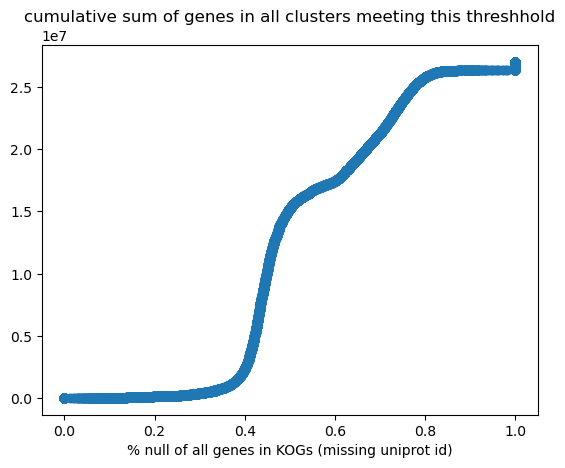

In [131]:
plt.scatter(cluster_info_sorted["nullpercentage"], cluster_info_sorted["CLUSTER_SIZE"].cumsum())
plt.xlabel("% null of all genes in KOGs (missing uniprot id)")
plt.title("cumulative sum of genes in all clusters meeting this threshhold")